# Customer Retention and Churn Analysis
* Uses Telco Customer Churn dataset from kaggle
  * https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download
 
The notebook goes through:
1. Checking data
2. Cleaning data
3. Analyzing data
4. Creating predictive models
   * Logistic regression model
   * Random forest model

# Prelimanary Check and Data Wrangling

In [1]:
# Import lbraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in data

df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
# Look at the data

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Look at the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Change TotalCharges column into float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# Analyze Data

In [7]:
# Calculate Churn Rate
print("Churn Rate:", df['Churn'].value_counts(normalize=True) * 100)

Churn Rate: Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


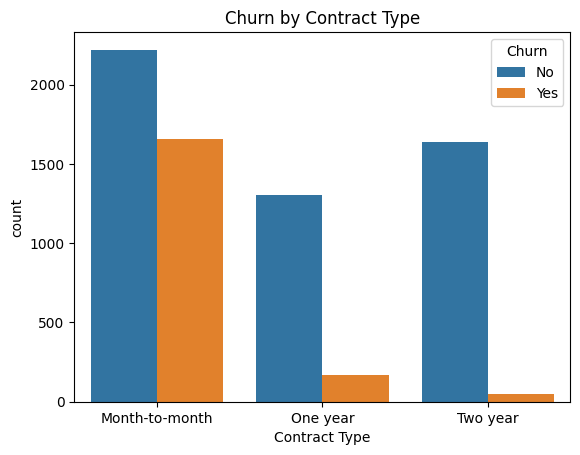

In [8]:
# Graph churn by contract type

sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.show()

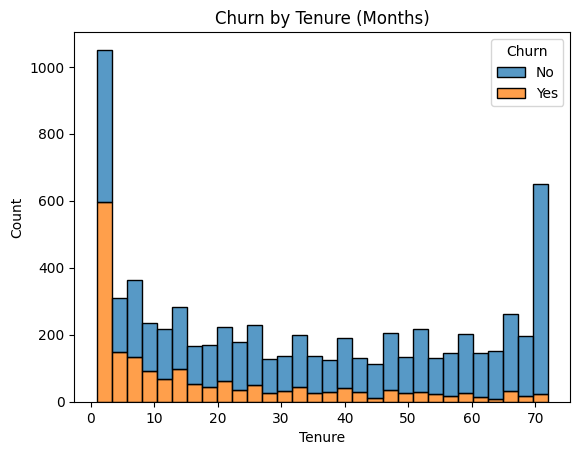

In [9]:
# Graph churn by tenure in months

sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Churn by Tenure (Months)")
plt.xlabel("Tenure")
plt.show()

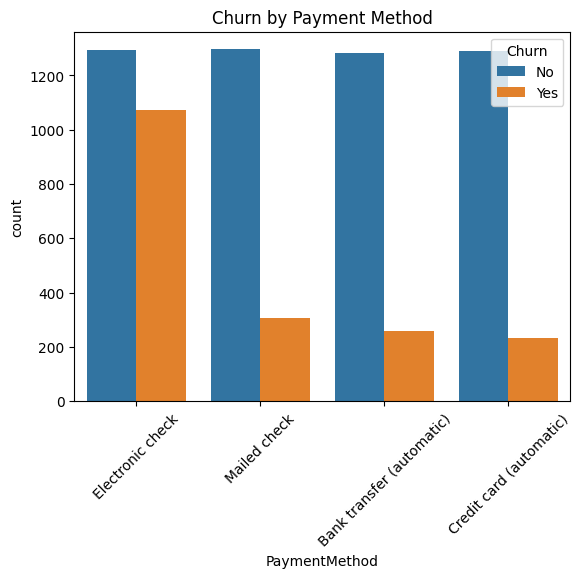

In [10]:
# Graph churn by payment method

sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()

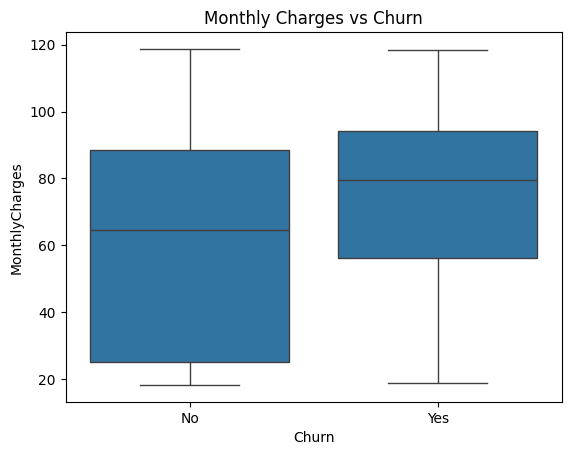

In [11]:
# Graph monthly charges vs churn

sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()

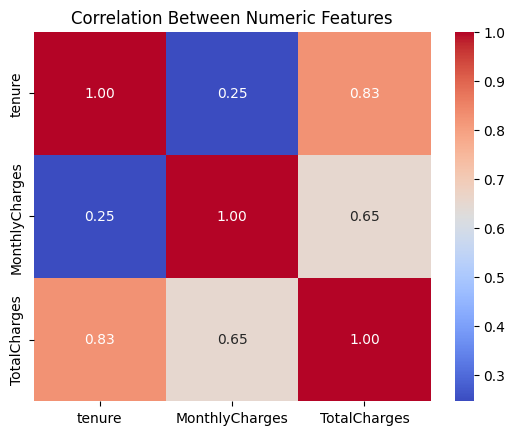

In [12]:
# Graph heatmap correaltion between numeric features

numeric_df = df[['tenure','MonthlyCharges','TotalCharges']]
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

Churn                   No        Yes
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


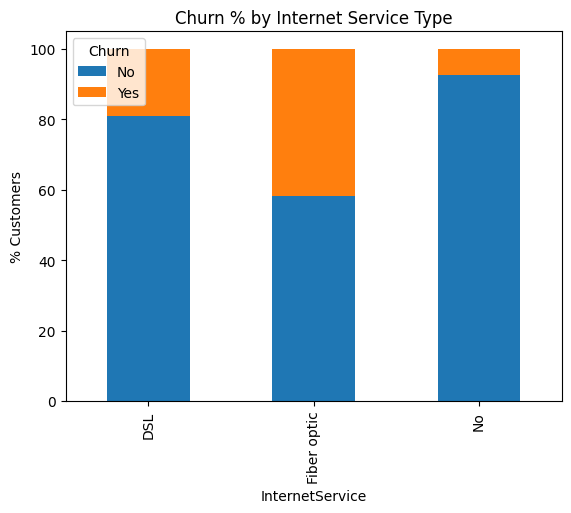

In [13]:
# Creat a pivot table and graph churn percentage by internet service type
churn_internet = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
print(churn_internet)

churn_internet.plot(kind='bar', stacked=True)
plt.title("Churn % by Internet Service Type")
plt.ylabel("% Customers")
plt.show()

In [14]:
# Some valuable insights

print("Average tenure of churned customers:", df[df['Churn']=="Yes"]['tenure'].mean())
print("Average tenure of retained customers:", df[df['Churn']=="No"]['tenure'].mean())

Average tenure of churned customers: 17.979133226324237
Average tenure of retained customers: 37.65000968429208


# Create Prediction Models

In [36]:
# Import libraries for prediction models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

# Create a Logistic Regression Model

In [16]:
# Create a copy model dataframe
model_df = df.copy()

In [18]:
# Encode categorical variables
for col in model_df.select_dtypes(include=['object']).columns:
    if col != 'customerID':
        model_df[col] = LabelEncoder().fit_transform(model_df[col])

In [19]:
# Features and target
X = model_df.drop(columns=['customerID', 'Churn'])
y = model_df['Churn']  # 0=No, 1=Yes

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [31]:
# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

In [29]:
# Model Evaluation

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1549
           1       0.50      0.79      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.74      0.75      2110

Confusion Matrix:
[[1108  441]
 [ 117  444]]
ROC-AUC Score: 0.8351066584272068


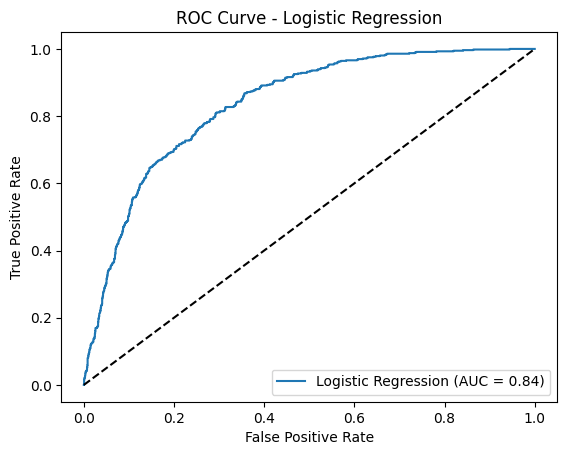

In [50]:
# Model ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [56]:
# Feature Importance
importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Top Predictive Features (Logistic Regression):")
print(importance_lr.head(10))

Top Predictive Features (Logistic Regression):
             Feature  Coefficient
4             tenure    -1.305566
17    MonthlyCharges     0.692250
18      TotalCharges     0.653742
14          Contract    -0.618807
5       PhoneService    -0.288746
11       TechSupport    -0.250459
8     OnlineSecurity    -0.249491
15  PaperlessBilling     0.155654
7    InternetService     0.143114
9       OnlineBackup    -0.138121


# Create a Random Forest Model

In [38]:
# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=200, 
    random_state=42, 
    class_weight='balanced',
    max_depth=10
)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

In [40]:
# Model Evaluation 
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC Score:", roc_auc_rf)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1549
           1       0.57      0.68      0.62       561

    accuracy                           0.78      2110
   macro avg       0.72      0.74      0.73      2110
weighted avg       0.79      0.78      0.78      2110

Confusion Matrix:
[[1260  289]
 [ 182  379]]
ROC-AUC Score: 0.8313718585620762


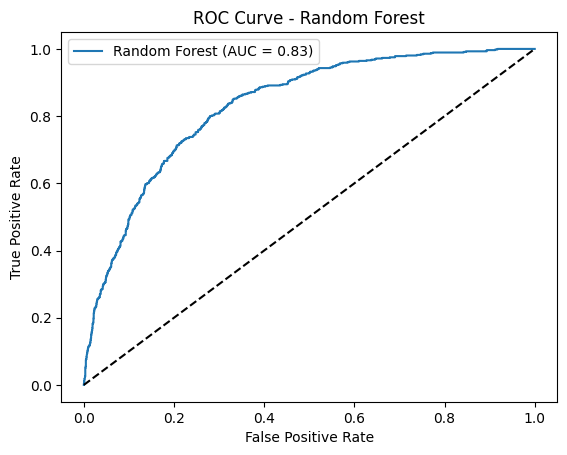

In [54]:
# Model ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [55]:
# Feature Importance
importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Predictive Features (Random Forest):")
print(importance_rf.head(10))

Top Predictive Features (Random Forest):
             Feature  Importance
14          Contract    0.159945
4             tenure    0.150420
18      TotalCharges    0.136607
17    MonthlyCharges    0.131068
8     OnlineSecurity    0.078078
11       TechSupport    0.070141
7    InternetService    0.047562
16     PaymentMethod    0.041050
9       OnlineBackup    0.027282
15  PaperlessBilling    0.022365


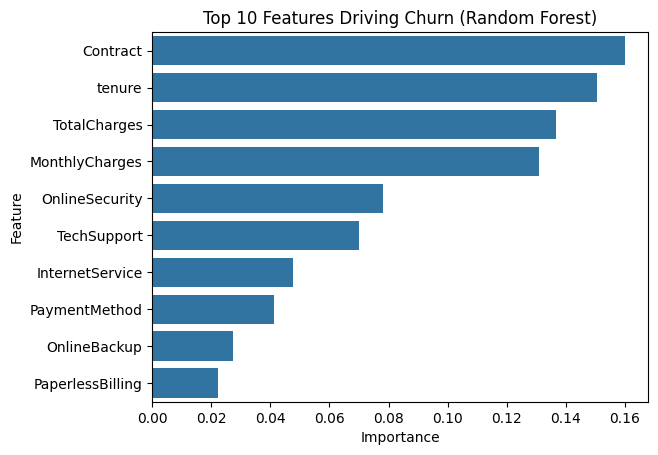

In [43]:
# Plot feature importance
sns.barplot(data=importance_rf.head(10), x='Importance', y='Feature')
plt.title("Top 10 Features Driving Churn (Random Forest)")
plt.show()

Compare Model ROC Curves

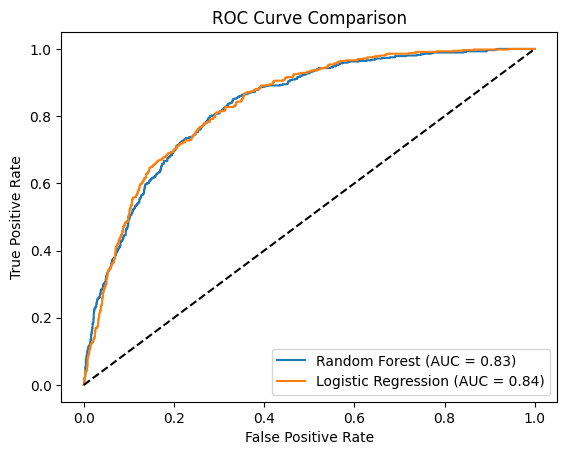

In [52]:
# Model ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()